In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('DataSet.csv')

In [3]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
df.tail(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.drop(["customerID"], axis =1, inplace = True)

In [6]:
df.shape

(7043, 20)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

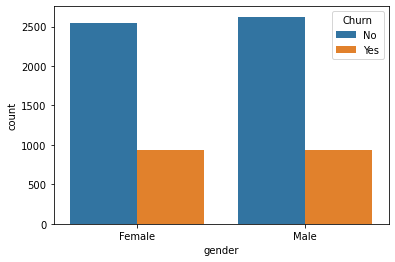

In [10]:
sns.countplot(x="gender",hue="Churn",data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

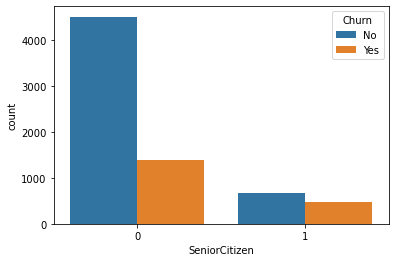

In [11]:
sns.countplot(x="SeniorCitizen",hue="Churn",data=df)

In [12]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

<AxesSubplot:>

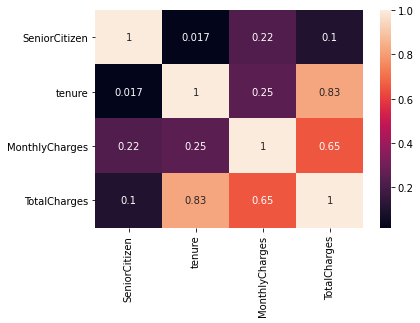

In [13]:
df.corr()
sns.heatmap(df.corr(), annot=True)

In [14]:
for i in df:
    print(df[i].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
['No' 'Yes']


In [15]:
df["TotalCharges"].fillna(df["TotalCharges"].median() , inplace =True)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["Partner"] = le.fit_transform(df["Partner"])
df["Dependents"] = le.fit_transform(df["Dependents"])
df["PhoneService"] = le.fit_transform(df["PhoneService"])
df["MultipleLines"] = le.fit_transform(df["MultipleLines"])
df["InternetService"] = le.fit_transform(df["InternetService"])
df["OnlineSecurity"] = le.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"] = le.fit_transform(df["OnlineBackup"])
df["DeviceProtection"] = le.fit_transform(df["DeviceProtection"])
df["TechSupport"] = le.fit_transform(df["TechSupport"])
df["StreamingTV"] = le.fit_transform(df["StreamingTV"])
df["StreamingMovies"] = le.fit_transform(df["StreamingMovies"])
df["Contract"] = le.fit_transform(df["Contract"])
df["PaperlessBilling"] = le.fit_transform(df["PaperlessBilling"])
df["PaymentMethod"] = le.fit_transform(df["PaymentMethod"])
df["Churn"] = le.fit_transform(df["Churn"])

In [17]:
df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int32  
 6   MultipleLines     7043 non-null   int32  
 7   InternetService   7043 non-null   int32  
 8   OnlineSecurity    7043 non-null   int32  
 9   OnlineBackup      7043 non-null   int32  
 10  DeviceProtection  7043 non-null   int32  
 11  TechSupport       7043 non-null   int32  
 12  StreamingTV       7043 non-null   int32  
 13  StreamingMovies   7043 non-null   int32  
 14  Contract          7043 non-null   int32  
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   int32  


<AxesSubplot:>

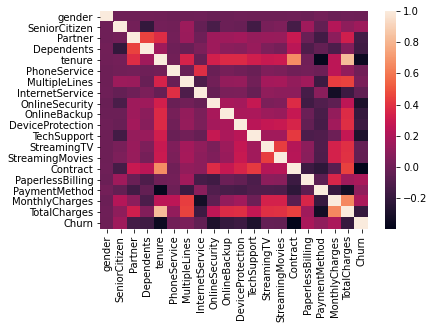

In [19]:
df.corr()
sns.heatmap(df.corr(), annot=False)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\d

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

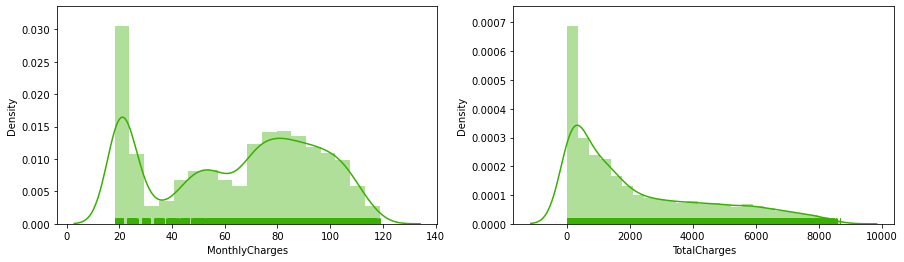

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(15,4))
sns.distplot(df['MonthlyCharges'],rug=True,color='#38b000',ax=axs[0])
sns.distplot(df['TotalCharges'],rug=True,color='#38b000',ax=axs[1])


In [21]:
x= df.iloc[:,0:19].values
y= df.iloc[:,19:20].values

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
smt = SMOTE()
x_resample, y_resample = smt.fit_resample(x,y)

In [24]:
x.shape, x_resample.shape

((7043, 19), (10348, 19))

In [25]:
y.shape,y_resample

((7043, 1), array([0, 0, 1, ..., 1, 1, 1]))

In [26]:
from sklearn.preprocessing import OneHotEncoder
one = OneHotEncoder()
a= one.fit_transform(x[:,6:7]).toarray()
b= one.fit_transform(x[:,7:8]).toarray()
c= one.fit_transform(x[:,8:9]).toarray()
d= one.fit_transform(x[:,9:10]).toarray()
e= one.fit_transform(x[:,10:11]).toarray()
f= one.fit_transform(x[:,11:12]).toarray()
g= one.fit_transform(x[:,12:13]).toarray()
h= one.fit_transform(x[:,13:14]).toarray()
i= one.fit_transform(x[:,14:15]).toarray()
j= one.fit_transform(x[:,16:17]).toarray()
x=np.delete(x,[6,7,8,9,10,11,12,13,14,16],axis=1)
x=np.concatenate((a,b,c,d,e,f,g,h,i,j,x),axis=1)

In [27]:
x.shape

(7043, 40)

In [28]:
y.shape

(7043, 1)

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [54]:
x_train

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.51000e+01, 6.15540e+03],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        4.63500e+01, 6.72700e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.47000e+01, 1.81055e+03],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.07500e+01, 1.18595e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        6.97500e+01, 6.97500e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.04000e+01, 9.45000e+01]])

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [57]:
lr_pred = lr.predict(x_test)

In [58]:
lr_pred

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [60]:
from sklearn.metrics import accuracy_score
lr_acc = accuracy_score(lr_pred,y_test)
lr_acc

0.7970191625266146

In [61]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(lr_pred,y_test)
print(lr_cm)
print('\n')
print(classification_report(y_test,lr_pred))

[[926 171]
 [115 197]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.54      0.58       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [62]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)

In [63]:
dtc_pred

array([0, 0, 0, ..., 0, 0, 1])

In [64]:
dtc_acc = accuracy_score(dtc_pred,y_test)
dtc_acc

0.7551454932576295

In [65]:
dtc_cm = confusion_matrix(dtc_pred,y_test)
print(dtc_cm)
print('\n')
print(classification_report(y_test,dtc_pred))

[[866 170]
 [175 198]]


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1041
           1       0.53      0.54      0.53       368

    accuracy                           0.76      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators = 300, criterion = "entropy",random_state=0)
rfc.fit(x_train,y_train)

<ipython-input-66-54bc545bdaf5>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [67]:
rfc_pred = rfc.predict(x_test)
rfc_pred

array([0, 0, 0, ..., 0, 0, 1])

In [68]:
rfc_acc = accuracy_score(rfc_pred,y_test)
rfc_acc

0.7750177430801988

In [69]:
rfc_cm = confusion_matrix(rfc_pred,y_test)
print(rfc_cm)
print('\n')
print(classification_report(y_test,rfc_pred))

[[915 191]
 [126 177]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.58      0.48      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409



In [70]:
from sklearn.svm import SVC
svm = SVC(kernel = "linear")
svm.fit(x_train,y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [71]:
svm_pred = svm.predict(x_test)
svm_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
svm_acc = accuracy_score(svm_pred,y_test)
svm_acc

0.7977288857345636

In [73]:
svm_cm = confusion_matrix(svm_pred,y_test)
print(svm_cm)
print('\n')
print(classification_report(y_test,svm_pred))

[[932 176]
 [109 192]]


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [78]:
svm_pred_own = svm.predict(sc.transform([[0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,460,1,0,3245,4567]]))

In [79]:
svm_pred_own

array([0])

In [80]:
import pickle
pickle.dump(svm,open("churn.pkl" , "wb"))